# **JOB CLASSIFICATION**
Job classification is a system for objectively and accurately defining and evaluating the duties, responsibilities, tasks, and authority level of a job. The job classification, done correctly, is a thorough description of the job responsibilities of a position without regard to the knowledge, skills, experience, and education of the individuals currently performing the job.

DESCRIPTION OF THE NOTEBOOK

In [0]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Mounting drive for the dataset to be accessed
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Read Dataset from drive and including only Job Type and Job Description columns 
df = pd.read_csv("/content/drive/My Drive/Machine Learning Project/Data/indeed_job_dataset.csv", error_bad_lines=False)
data = df.iloc[:,[4,11]].astype(str)
data.sample(10)

,Job_Type,Description
1900,data_scientist,"[<p><b>Position Description</b></p>, <ul><li>A..."
2990,data_analyst,[<p><b>JOB SUMMARY:</b> This position is respo...
771,data_scientist,[<ul>\r\r\n<li><div>Partner closely with stake...
4292,data_analyst,[<p><b>Head of Category Analytics</b><br/>\r\r...
3873,data_analyst,[<ul><li>Provide on-going analytical support u...
5247,data_engineer,"[<p><b>Job Summary</b></p>, <p><b>External Rol..."
3949,data_analyst,[<p>This position will support the measurement...
5502,data_engineer,[<p><b>Data Engineer</b><br/>\r\r\n<br/>\r\r\n...
235,data_scientist,[<ul><li>Build predictive models to meet busin...
2671,data_analyst,[<p>Our Claims Analytics department is seeking...


In [0]:
data.dtypes

Job_Type       object
Description    object
dtype: object

Lets Visualize Our Job_Type

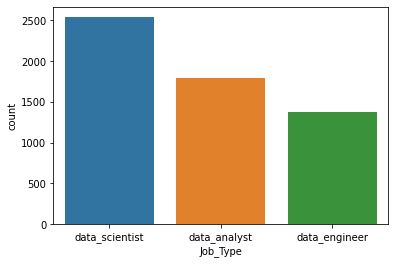

In [0]:
import seaborn as sns
sns.countplot(x = 'Job_Type', data = data)

Lets Check our data, see if there is null value or not!



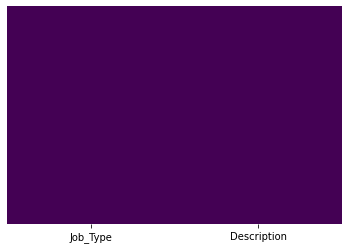

In [0]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="viridis")

## **Data Preprocessing - Cleaning of Data**

In [0]:
#importing necessary modules
import nltk
from nltk import ngrams
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
 #convert all the text into lowercase
 data['Description'] = data.Description.str.lower()

In [0]:
#function to remove all HTML tags
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

#removing all the html tags
data['New'] = data['Description'].apply(lambda row: remove_html_tags(row))

In [0]:
#function to remove all numbers
def remove_nums(s):
    return re.sub('[^\s]*[0-9]+[^\s]*', "", s)

data['New'] = data['New'].map(remove_nums)

In [0]:
#remove \n and \r tags
data["New"] = data.New.str.replace("\\n", " ")
data["New"] = data.New.str.replace("\\r", " ")

In [0]:
# Remove the urls - Anything that has .com, .co.uk or www. is a url!
def remove_urls(s):
    s = re.sub('[^\s]*.com[^\s]*', "", s)
    s = re.sub('[^\s]*www.[^\s]*', "", s)
    s = re.sub('[^\s]*.co.uk[^\s]*', "", s)
    return s

data['New'] = data['New'].map(remove_urls)

In [0]:
# Remove the star_words
def remove_star_words(s):
    return re.sub('[^\s]*[\*]+[^\s]*', "", s)

data['New'] = data['New'].map(remove_star_words)

In [0]:
#remove punctuation and tokenize
tokenizer = RegexpTokenizer(r'\w+')
data["Tokens"] = data.apply(lambda row: tokenizer.tokenize(row['New']), axis=1)

In [0]:
# remove stopwords
stop_words = stopwords.words('english')
data['Tokens'] = data['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])

In [0]:
#merge tokens back into string text
data['Tokens'] = [" ".join(txt) for txt in data["Tokens"].values]

**Data is ready to work upon!!**

In [0]:
data.sample(10)

,Job_Type,Description,New,Tokens
3371,data_analyst,"[<p><b>about riskspan</b></p>, <p>\r\r\nrisksp...","[about riskspan, riskspan is a leading sour...",riskspan riskspan leading source analytics mod...
4368,data_engineer,[<ul><li>bachelor's degree (engineering/comput...,[bachelor's degree science preferred but not ...,bachelor degree science preferred required equ...
4409,data_engineer,[<p><b>infrastructure data engineer - 22682</b...,[infrastructure data engineer - technology...,infrastructure data engineer technology engine...
2273,data_scientist,"[<p>job type: analytics</p>, <p>iq workforce p...","[job type: analytics, iq workforce provides ta...",job type analytics iq workforce provides talen...
5164,data_engineer,[<p><b>about us!</b><br/>\r\r\n<br/>\r\r\nat m...,"[about us! at maven wave, we are relentle...",us maven wave relentless hiring industry top t...
2340,data_scientist,[<ul>\r\r\n<li>work with stakeholders througho...,[ work with stakeholders throughout the orga...,work stakeholders throughout organization iden...
4577,data_engineer,[<p>this position will be located within (dev/...,[this position will be located within (dev/it)...,position located within dev work closely scien...
693,data_scientist,"[<p><b>job title\r\r\n</b></p>, <p><b>job desc...","[job title , job description , we are look...",job title job description looking senior data ...
284,data_scientist,[<p>day zero diagnostics is a bacterial genomi...,[day zero diagnostics is a bacterial genomics ...,day zero diagnostics bacterial genomics start ...
4821,data_engineer,[<ul><li>\r\r\nact as subject matter expert an...,[ act as subject matter expert and keep the ...,act subject matter expert keep team date stand...


**Generating WordCloud of the Tokens column to indicate which word if of higher frequency**

WordCloud for Data Scientists Job Type



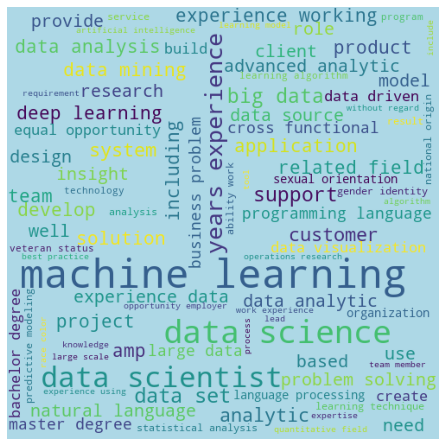

In [0]:
data_sc = data[data['Job_Type']=='data_scientist']

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data_sc.Tokens: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
				background_color ='lightblue', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


WordCloud for Data Engineer Job Type

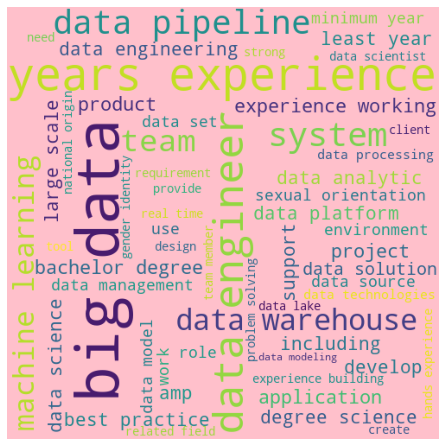

In [0]:
data_en = data[data['Job_Type']=='data_engineer']

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data_en.Tokens: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
				background_color ='pink', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


WordCloud for Data Analyst Job Type

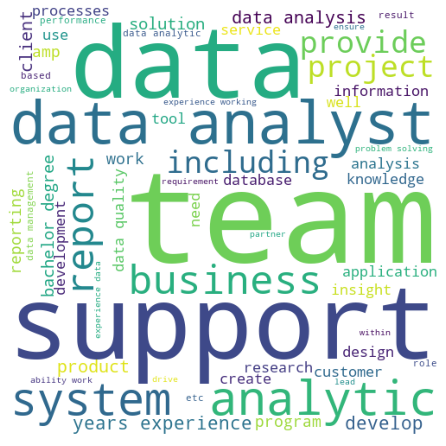

In [0]:
data_anal = data[data['Job_Type']=='data_analyst']

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data_anal.Tokens: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [0]:
#importing necessary modules
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, naive_bayes, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Tf-Idf vectorization of column 'Tokens'**

In [0]:
X = data['Tokens']
vectorizer = TfidfVectorizer(max_features=100)
vectorizer.fit(X)
# transoforming text to tdif features
X_tfidf = vectorizer.transform(X)
# sparse matrix to dense matrix for training
X_tfidf = X_tfidf.toarray()

**Label Encoding of the Target variable 'Job_Type'**

In [0]:
y = data['Job_Type']
encoder = LabelEncoder()
encoder.fit(y.values)
y_enc = encoder.transform(data.Job_Type)
y_enc

array([2, 2, 2, ..., 1, 1, 1])

 **Applying Train Test Split to the data to avoid Overfitting of the Model**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_enc, test_size=0.15, random_state=10)

# transoforming text to tdif features
#X_train = vectorizer.transform(X_train_words)
# sparse matrix to dense matrix for training
#X_train = X_train.toarray()

#X_test = vectorizer.transform(X_test_words)
#X_test = X_test.toarray()

**Building a Function to Plot Confusion matrix**

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

   
    cm = confusion_matrix(y_true, y_pred)
   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
          
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

   
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## **`Gaussian Naive Bayes`**

**Training and testing model using Gaussian Naive Bayes, calculating accuracy and building confusion matrix**

In [0]:
gnb = GaussianNB()
train_preds = gnb.fit(X_train, y_train).predict(X_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = metrics.accuracy_score(y_test,gnb_pred)

print('Gaussian Naive Bayes Accuracy: {0}'.format(gnb_accuracy))

Gaussian Naive Bayes Accuracy: 0.7657342657342657


Confusion matrix, without normalization
[[210  21  26]
 [ 31 156  20]
 [ 79  24 291]]


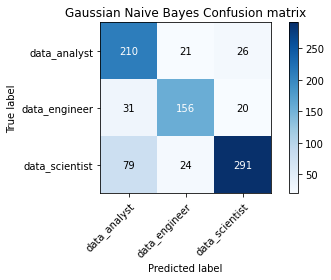

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, gnb_pred, classes=class_names, title='Gaussian Naive Bayes Confusion matrix')

## **`Logistic Regression`**

**Training and testing model using Logistic Regression, calculating accuracy and building confusion matrix**

In [0]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=15,verbose=1, C=0.75)

train_preds = logistic.fit(X_train, y_train).predict(X_train)
lr_pred = logistic.predict(X_test)
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)

print('Logistic Regression Accuracy: {0}'.format(lr_accuracy))

Logistic Regression Accuracy: 0.8006993006993007


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Confusion matrix, without normalization
[[212  14  31]
 [ 27 159  21]
 [ 58  20 316]]


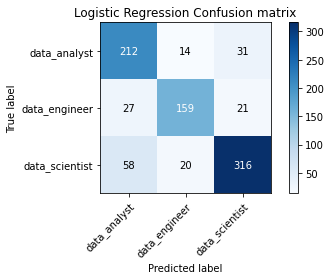

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, lr_pred, classes=class_names, title='Logistic Regression Confusion matrix')

## **`Support Vector Machine`**

**Training and testing model using Support Vector Machine, calculating accuracy and building confusion matrix**

In [0]:
svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)

print('SVM Accuracy: {0}'.format(svm_accuracy))

SVM Accuracy: 0.8065268065268065


Confusion matrix, without normalization
[[201  15  41]
 [ 23 162  22]
 [ 44  21 329]]


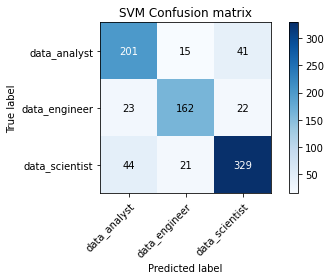

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, svm_pred, classes=class_names, title='SVM Confusion matrix')

## **`Naive Bayes`**

**Training and testing model using Naive Bayes, calculating accuracy and building confusion matrix**

In [0]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
naive_pred = nb_classifier.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, naive_pred)

print('Naive Bayes Accuracy: {0}'.format(nb_accuracy))

Naive Bayes Accuracy: 0.7657342657342657


Confusion matrix, without normalization
[[183   6  68]
 [ 31 125  51]
 [ 37   8 349]]


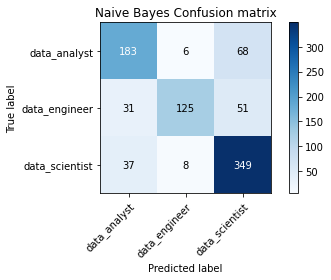

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, naive_pred, classes=class_names, title='Naive Bayes Confusion matrix')

## **`K-Nearest Neighbour`**

**Training and testing model using K-Nearest Neighbour, calculating accuracy and building confusion matrix**

Classifying model using k = 1

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('Knn Accuracy with k=1: {0}'.format(metrics.accuracy_score(y_test, knn_pred)))

Knn Accuracy with k=1: 0.7878787878787878


Confusion matrix, without normalization
[[187  25  45]
 [ 21 166  20]
 [ 45  26 323]]


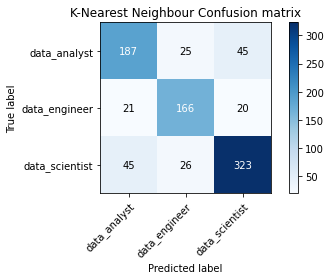

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, knn_pred, classes=class_names, title='K-Nearest Neighbour Confusion matrix')

**Evaluating our KNN model using different values of K**

In [0]:
#importing necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
#calculating the score 
score = cross_val_score(knn,X_tfidf, y,cv=10).mean()
score

0.7366688915287865

In [0]:
#evaluating model using Values of K from 1 to 30
accuracy_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_tfidf, y,cv=10)
    accuracy_rate.append(score.mean())

**Plotting the values of K alongwith the accuracy rate**

Text(0, 0.5, 'Accuracy Rate')

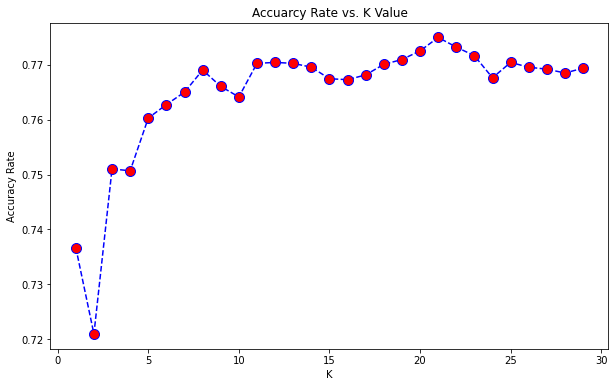

In [0]:
#plotting line graph using matplotlib 
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuarcy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

**Finding the highest accuracy among different values of k used**

In [0]:
knn_accuracy=accuracy_rate.index(max(accuracy_rate))
print( "The best accuracy was with", max(accuracy_rate), "with k=", accuracy_rate.index(max(accuracy_rate)) ) 

The best accuracy was with 0.7749797925367103 with k= 20


Using k=20 with highest accuracy, training and testing model using K-Nearest Neighbour and building confusion matrix



In [0]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
print('Knn Accuracy : {0}'.format(knn_accuracy))

Knn Accuracy : 0.7925407925407926


Confusion matrix, without normalization
[[206  19  32]
 [ 22 164  21]
 [ 49  35 310]]


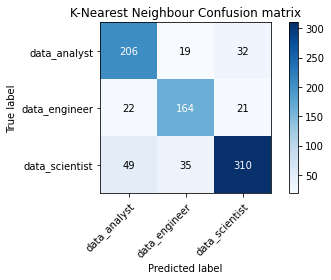

In [0]:
class_names = np.unique(y)
plot_confusion_matrix(y_test, knn_pred, classes=class_names, title='K-Nearest Neighbour Confusion matrix')

## Classification Report of all the models applied 

In [0]:
#Gaussian Nave Bayes
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       257
           1       0.78      0.75      0.76       207
           2       0.86      0.74      0.80       394

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.76       858
weighted avg       0.78      0.77      0.77       858



In [0]:
#Logistic Regression
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.77       257
           1       0.82      0.77      0.79       207
           2       0.86      0.80      0.83       394

    accuracy                           0.80       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.81      0.80      0.80       858



In [0]:
#Support Vector Machine 
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       257
           1       0.82      0.78      0.80       207
           2       0.84      0.84      0.84       394

    accuracy                           0.81       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.81      0.81      0.81       858



In [0]:
#Nave Bayes
print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       257
           1       0.90      0.60      0.72       207
           2       0.75      0.89      0.81       394

    accuracy                           0.77       858
   macro avg       0.79      0.73      0.75       858
weighted avg       0.78      0.77      0.76       858



In [0]:
#K-Nearest Neighboour
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       257
           1       0.75      0.79      0.77       207
           2       0.85      0.79      0.82       394

    accuracy                           0.79       858
   macro avg       0.78      0.79      0.79       858
weighted avg       0.80      0.79      0.79       858



## **`PCA`**

**Plotting using PCA**

In [0]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot 
    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'data scientist',
        "1": 'data engineer',
        "2": 'data analyst'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.set_palette("hls", 5)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    #palette=["red", "blue", "darkgreen"],
                    alpha=.7).set_title(title);

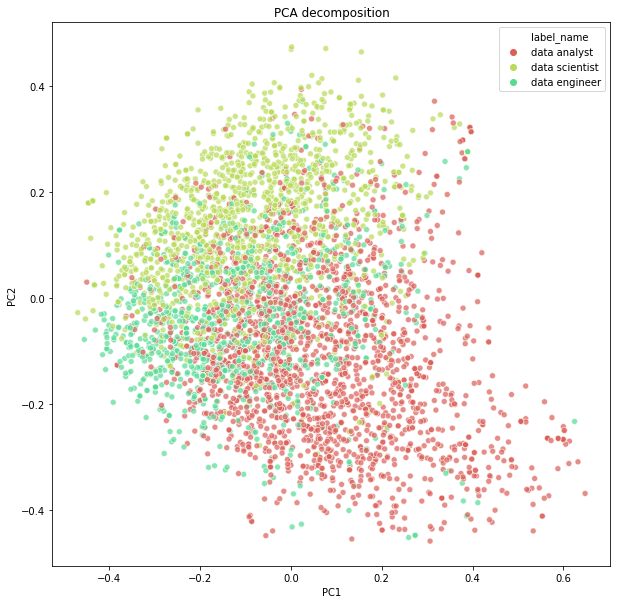

In [0]:
plot_dim_red("PCA", features=X_train, labels=y_train, n_components=2)

In [0]:
cols = ['Actual Type','Gaussian_Type','LR_Type', 'SVM_Type','NB_Type','KNN_Type']
test_data = pd.DataFrame(data=None, columns=cols)
test_data['Actual Type'] = y_test
test_data['Gaussian_Type'] = gnb_pred
test_data['LR_Type'] = lr_pred
test_data['SVM_Type'] = svm_pred
test_data['NB_Type'] = naive_pred
test_data['KNN_Type'] = knn_pred


In [0]:
test_data = test_data.replace(to_replace=[0], value='Data Scientist')
test_data = test_data.replace(to_replace=[1], value='Data Engineer')
test_data = test_data.replace(to_replace=[2], value='Data Analyst')
test_data.head(10)

,Actual Type,Gaussian_Type,LR_Type,SVM_Type,NB_Type,KNN_Type
0,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer
1,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer
2,Data Scientist,Data Scientist,Data Analyst,Data Scientist,Data Scientist,Data Scientist
3,Data Analyst,Data Analyst,Data Analyst,Data Analyst,Data Analyst,Data Analyst
4,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
5,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer,Data Engineer
6,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
7,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
8,Data Engineer,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
9,Data Engineer,Data Scientist,Data Engineer,Data Engineer,Data Scientist,Data Engineer


## Accuracy Plots

In [0]:
data = {'Algorithm ': ['Gaussian','Naive bayes','Logistic','SVM','KNN'], 'Accuracy':[gnb_accuracy*100,nb_accuracy*100,lr_accuracy*100,svm_accuracy*100,knn_accuracy*100]}
accuracy = pd.DataFrame(data)

In [0]:
accuracy

,Algorithm,Accuracy
0,Gaussian,76.573427
1,Naive bayes,76.573427
2,Logistic,80.069930
3,SVM,80.652681
4,KNN,79.254079


### Bar Plot

In [0]:
import plotly.graph_objects as go
colors = ['lightslategray', 'crimson', 'blue', 'green', 'red']

fig = go.Figure([go.Bar(x=accuracy['Algorithm '], y=accuracy['Accuracy'],text=accuracy['Accuracy'],width=[0.8,0.8,0.8,0.8,0.8],marker_color=colors,
            textposition='auto',)])
fig.show()